In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import sys
import collections
import requests
import operator
from tabulate import tabulate
import seaborn as sns
sns.set(style="whitegrid")
import pandas as pd
import numpy as np
import math
import types
url = "https://api.ekstep.org/learning-api/v2/content/list"

payload = "{\n  \"request\": { \n      \"search\": {\n          \"status\": [\"Live\", \"Draft\", \"Retired\"],\n          \"contentType\": [\"Game\", \"Worksheet\", \"Story\"],\n          \"limit\": 2000\n      }\n  }\n}"
headers = {
   'content-type': "application/json",
   'user-id': "mahesh",
   'cache-control': "no-cache",
   'postman-token': "d0fafff9-911a-9a91-2016-cfc4714cf543"
   }

resp = requests.request("POST", url, data=payload, headers=headers).json()

In [2]:
#This gives the keys of any dictionary in sorted order
#It returns None value if it is not a dictionary and raises an error message
#If you wish to debug the code then pass a "verbose=true" argument
def get_keys(obj,**kwargs):
    a=False
    try:
        if(kwargs["verbose"]):
            a=True
    except KeyError:
        ;
    if(isinstance(obj,dict)):
        key_list=list(obj.keys())
        #print(key_list)
        key_list.sort()
        if(len(key_list)>0):
            return key_list
        else:
            if(a):
                print("No keys. Empty dictionary")
            return
    else:
        if(a):
            print("This is not a dictionary")
        return

In [3]:
print(get_keys(resp))

[u'id', u'params', u'responseCode', u'result', u'ts', u'ver']


In [4]:
#This gets all the keys of the object with corresponding subkeys
def get_all_keys(obj):
    x=[]
    if(isinstance(obj,dict)):
        a=get_keys(obj)
        if(a!=None):
            for i in a:
                y=[]
                x.append(i)
                b=get_all_keys(obj[i])
                if(b!=None):
                    for j in b:
                        try:
                            y.index(j)
                        except ValueError:
                            y.append(j)
                if(len(y)>0):
                    x.append(y)
    elif(isinstance(obj,list)):
        y=[]
        for i in obj:
            a=get_all_keys(i)
            if(a!=None):
                for j in a:
                    try:
                        y.index(j)
                    except ValueError:
                        y.append(j)
        if(len(y)>0):
            x=y
    if(len(x)>0):
        return x
    else:
        return            

In [5]:
#This prints the keys obtained from above in a nested fashion
def parse_keys(obj,a):
    for i in obj:
        if(isinstance(i,list)):
            b="\t"+a
            parse_keys(i,b)
        else:
            print(a,i)

In [8]:
#parse_keys(get_all_keys(resp),"")

In [6]:
#This parses a dictionary object
def parse_query(obj):
    if(isinstance(obj,dict)):
        for i in get_keys(obj):
            if(isinstance(obj[i],dict)):
                print("\n",i, ":",get_keys(obj[i]))
            else:
                print("\n",i,":",obj[i])

In [7]:
parse_query(resp)

('\n', u'id', ':', u'ekstep.content.list')
('\n', u'params', ':', [u'err', u'errmsg', u'msgid', u'resmsgid', u'status'])
('\n', u'responseCode', ':', u'OK')
('\n', u'result', ':', [u'content', u'ttl'])
('\n', u'ts', ':', u'2016-06-30T07:32:55ZZ')
('\n', u'ver', ':', u'2.0')


In [8]:
contentList = resp["result"]["content"]
content_keys=get_all_keys(contentList)

In [9]:
contentDF = pd.DataFrame(contentList)

In [77]:
usefulContent =contentDF[['concepts', 'description', 'domain' , 'contentType', 'tags', 'language']]

In [78]:
usefulContent.head()

,concepts,description,domain,contentType,tags,language
0,"[{u'index': None, u'description': u'Teacher Te...",Hallowen house,NaN,Story,NaN,[English]
1,NaN,Test10may,NaN,Story,NaN,[English]
2,"[{u'index': None, u'description': u'Understand...",Kannada Level 1 Stories,NaN,Story,NaN,[Kannada]
3,NaN,.,NaN,Story,NaN,[Kannada]
4,NaN,Flascards,NaN,Worksheet,NaN,[Kannada]


In [73]:
# to check if num is NaN
def isNaN(num):
    print(num)
    return num != num

In [202]:
#creating  css to format pandas dataframe
CSS = """
body {
    margin: 0;
    font-family: Helvetica;
}
table.dataframe {
    border-collapse: collapse;
    border: none;
}
table.dataframe tr {
    border: none;
}
table.dataframe td, table.dataframe th {
    margin: 0;
    border: 1px solid white;
    padding-left: 0.25em;
    padding-right: 0.25em;
}
table.dataframe th:not(:empty) {
    background-color: #fec;
    text-align: left;
    font-weight: normal;
}
table.dataframe tr:nth-child(2) th:empty {
    border-left: none;
    border-right: 1px dashed #888;
}
table.dataframe td {
    border: 2px solid #ccf;
    background-color: #f4f4ff;
}
"""

In [203]:
from IPython.core.display import HTML
HTML('<style>{}</style>'.format(CSS))

In [57]:
usefulContent.is_copy = False

In [58]:
usefulContent['description'][386]

u'Prathamcamalfinaldemo123'

In [201]:
%%capture
usefulContent['DescLen'] = usefulContent['description'].map(lambda x: 0 if isNaN(x) else len(x))
usefulContent['domain'] = usefulContent['domain'].map(lambda x: x if isNaN(x) else str(x[0]))
usefulContent['language'] = usefulContent['language'].map(lambda x: x if isNaN(x) else str(x[0]))
#usefulContent['contentType'] = usefulContent['contentType'].map(lambda x: x if isNaN(x) else str(x))

In [238]:
usefulContent.head()

,concepts,description,domain,contentType,tags,language,DescLen,conceptsID
0,"[{u'index': None, u'description': u'Teacher Te...",Hallowen house,NaN,Story,NaN,E,14,LT6
1,NaN,Test10may,NaN,Story,NaN,E,9,NaN
2,"[{u'index': None, u'description': u'Understand...",Kannada Level 1 Stories,NaN,Story,NaN,K,23,LT6
3,NaN,.,NaN,Story,NaN,K,1,NaN
4,NaN,Flascards,NaN,Worksheet,NaN,K,9,NaN


### Boxplot : Description length vs Content Type

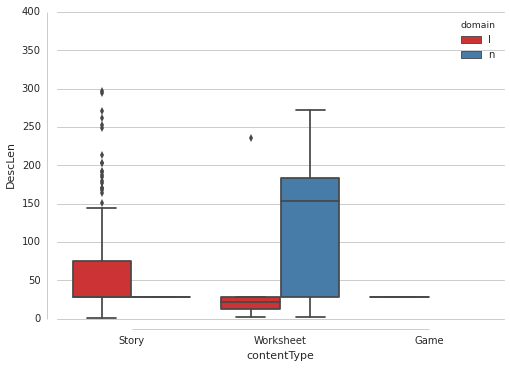

In [239]:
sns.boxplot(x="contentType", y="DescLen", hue="domain", data=usefulContent, palette="Set1")
plt.ylim(0, 400)
sns.despine(offset=10, trim=True)

## Split Violin plots Description length vs Content Type

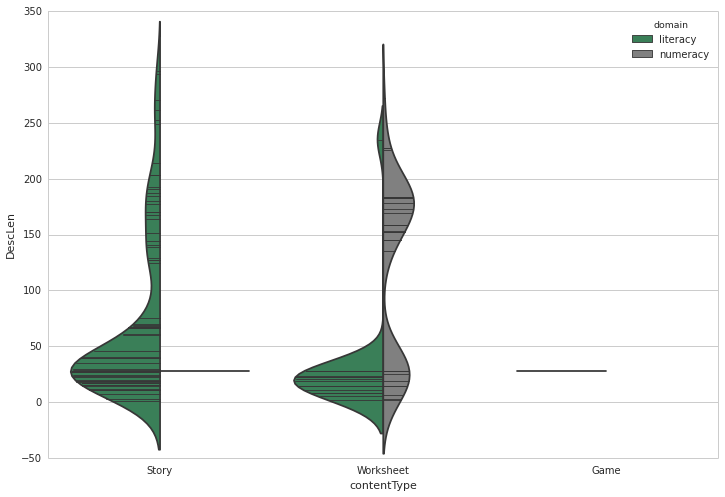

In [169]:
pal = dict(literacy="seagreen", numeracy="gray")
a4_dims = (12, 8)
fig, ax = plt.subplots(figsize=a4_dims)
sns.violinplot(ax=ax,x="contentType", y="DescLen", hue="domain",
  data=usefulContent, palette=pal, split=True,
   inner="stick", bw=.3)

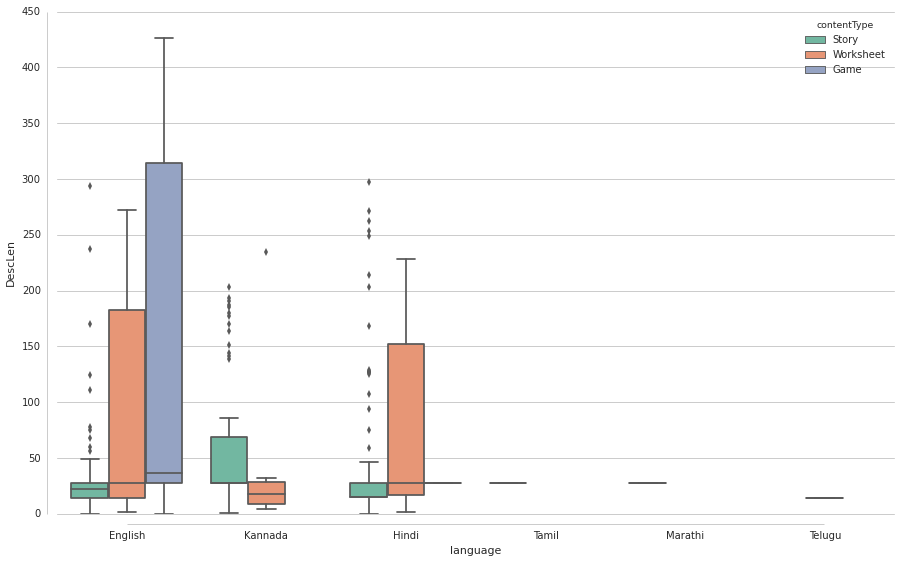

In [158]:
#boxplot language vs DescLen
a4_dims = (15, 9)
fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(ax=ax,x="language", y="DescLen", hue="contentType", data=usefulContent, palette="Set2")
plt.ylim(0, 450)
#sns.stripplot(x="contentType", y="DescLen", hue="domain",data=usefulContent, jitter=True, linewidth=1,palette="Set1")
sns.despine(offset=10, trim=True)

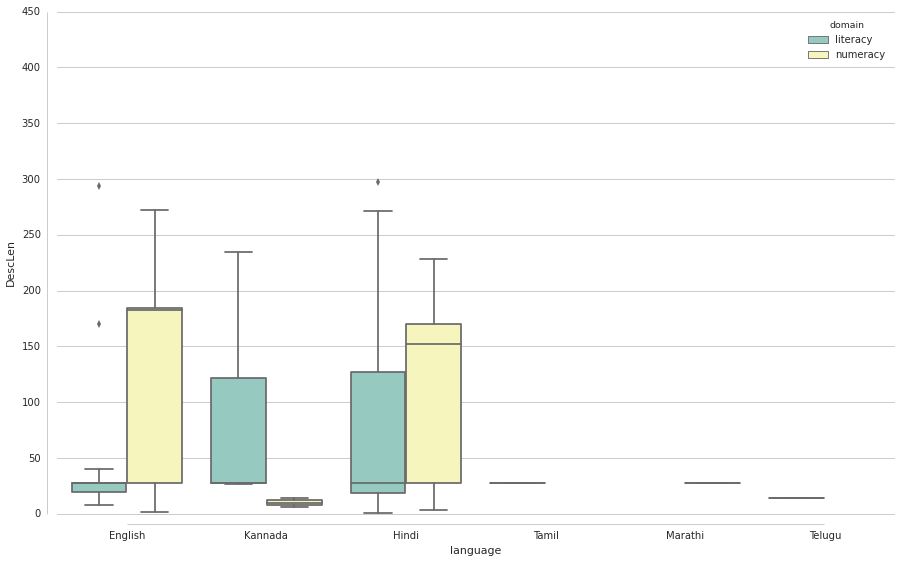

In [157]:
#boxplot language vs DescLen

a4_dims = (15, 9)
fig, ax = plt.subplots(figsize=a4_dims)

sns.boxplot(ax=ax, x="language", y="DescLen", hue="domain", data=usefulContent, palette="Set3")
plt.ylim(0, 450)
#sns.stripplot(x="contentType", y="DescLen", hue="domain",data=usefulContent, jitter=True, linewidth=1,palette="Set1")
sns.despine(offset=10, trim=True)

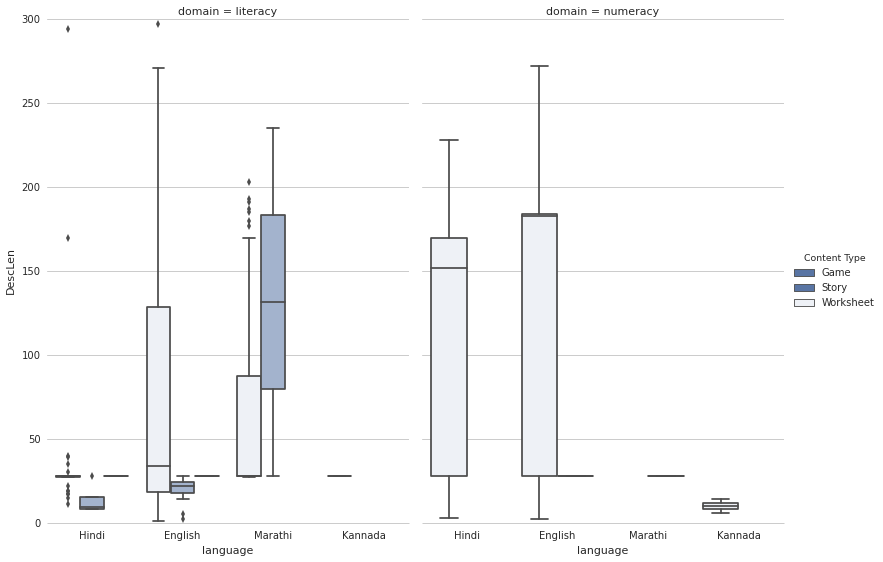

In [189]:
pal = dict(Story="seagreen", Worksheet="gray", Game = 'blue')
g = sns.FacetGrid(usefulContent, col="domain", size=8, aspect=.7, palette = pal)
(g.map(sns.boxplot, "language", "DescLen", "contentType")
 .despine(left=True)
 .add_legend(title="Content Type")) 

In [62]:
#saving to csv
usefulContent.to_csv('/Users/ajitbarik/example.csv', sep ='\t', encoding='utf-8')

In [68]:
#reading the csv
usefulDF = pd.read_csv('/Users/ajitbarik/example.csv', sep ='\t', index_col=0)

In [98]:
import PIL
from wordcloud import WordCloud, STOPWORDS

In [109]:
# get all the tags for literacy
def get_unique_values_for_tags(column, df, option):
    lst_values = []
    for i in range(len(df[column])): 
        if not isNaN(df.eval(column)[i]):
            if df.domain[i] == option:
                lst_tag = df.eval(column)[i]
                #print(lst_tag)
                [x.encode('UTF8') for x in lst_tag]
                for tag in lst_tag:
                    lst_values.append(tag)
    return(lst_values)

In [205]:
%%capture
lst_tags_literacy = get_unique_values_for_tags('tags', usefulContent, 'literacy');
lst_tags_numeracy = get_unique_values_for_tags('tags', usefulContent, 'numeracy');

In [112]:
#making a corpus of words
words_literacy = ' '.join(lst_tags_literacy)
words_numeracy = ' '.join(lst_tags_numeracy)

In [113]:
#to make a worldcloud
def make_wordcloud(word_corpus):
    wordcloud = WordCloud(
                          
                          stopwords=STOPWORDS,
                          background_color='black',
                          width=1800,
                          height=1400
                         ).generate(word_corpus)

    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()

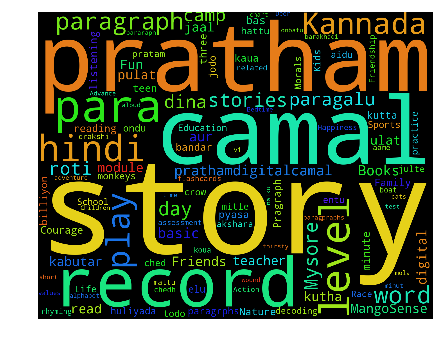

In [114]:
#literacy word cloud
make_wordcloud(words_literacy)

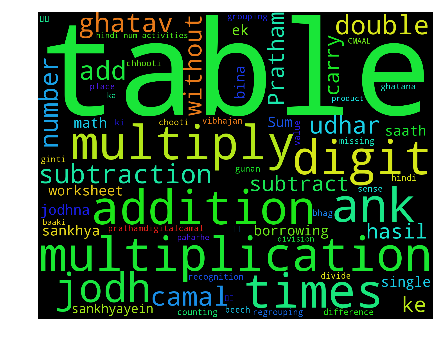

In [115]:
#numeracy word cloud
make_wordcloud(words_numeracy)

In [175]:
# extracting identifier from concepts
temp = usefulContent.concepts[0]

temp


In [176]:
temp

[{u'description': u'Teacher Teacher! (decide if spelling is right or wrong after listening to word)',
  u'identifier': u'LT6',
  u'index': None,
  u'name': u'Teacher Teacher!',
  u'objectType': u'Concept',
  u'relation': u'associatedTo'}]

In [181]:
temp = temp[0]

In [184]:
id = temp['identifier']

In [186]:
str(id)

'LT6'

In [191]:
def get_concepts_ID(x):
    id = temp['identifier']
    return(str(id))

In [193]:
%%capture
usefulContent['conceptsID'] = usefulContent['concepts'].map(lambda x: x if isNaN(x) else get_concepts_ID(x))

In [212]:
usefulContent['conceptsID'].head()

0    LT6
1    NaN
2    LT6
3    NaN
4    NaN
Name: conceptsID, dtype: object

In [230]:
%%capture
#get all concepts
lst_allConcepts = []
for i in range(len(usefulContent['conceptsID'])): 
    if not isNaN(usefulContent.conceptsID[i]):
        lst_con = usefulContent.conceptsID[i]
        if not isinstance(lst_con, types.StringTypes):
            for str_con in lst_con:
                lst_allConcepts.append(str_con)
        else:
            lst_allConcepts.append(lst_con)

In [229]:
isinstance(temp1, types.StringTypes)

True

In [234]:
usefulContent.head()

,concepts,description,domain,contentType,tags,language,DescLen,conceptsID
0,"[{u'index': None, u'description': u'Teacher Te...",Hallowen house,NaN,Story,NaN,E,14,LT6
1,NaN,Test10may,NaN,Story,NaN,E,9,NaN
2,"[{u'index': None, u'description': u'Understand...",Kannada Level 1 Stories,NaN,Story,NaN,K,23,LT6
3,NaN,.,NaN,Story,NaN,K,1,NaN
4,NaN,Flascards,NaN,Worksheet,NaN,K,9,NaN


In [235]:
tempdf =usefulContent[["DescLen", "conceptsID", "domain"]]